In [21]:
import os
from keras import layers
from keras import models
from keras import optimizers


# fill this part
from keras.preprocessing.image import ImageDataGenerator



base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.9,
      zoom_range=0.8,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='reflect'
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [ ]:
from matplotlib import pyplot
# prepare iterator
# generate samples and plot
images, labels = train_generator.next()
print(images.shape[0])

for i in range(images.shape[0]):
    print(i)
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # convert to unsigned integers for viewing
    image = images[i].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

0 input_7 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                524352    
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0

In [13]:
conv_base.summary()
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [26]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(150, 150, 3))


0 input_10 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
Epoch 1/10
80/80 [==============================] - 35s 433ms/step - loss: 0.9985 - acc: 0.5574 - val_loss: 1.0319 - val_acc: 0.7362
Epoch 2/10
80/80 [==============================] - 17s 214ms/step - loss: 0.7310 - acc: 0.6734 - val_loss: 0.7173 - val_acc: 0.8013
Epoch 3/10
80/80 [==============================] - 23s 293ms/step - loss: 0.6867 - acc: 0.6991 - val_loss: 0.2424 - val_acc: 0.8881
Epoch 4/10
80/80 [==============================] - 16s 200ms/step - loss: 0.6250 - acc: 0.7498 - val_loss: 0.2787 - val_acc: 0.8541
Epoch 5/10
80/80 [==============================] - 16s 202ms/step - loss

In [33]:
for i, layer in enumerate(conv_base.layers):
    print(i, layer.name, layer.trainable)

0 input_12 False
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

for layer in conv_base.layers[:15]:
    layer.trainable = False
#for i, layer in enumerate(conv_base.layers):
#    print(i, layer.name, layer.trainable)
#model.summary()
model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(lr=0.001),
              optimizer=optimizers.adam(lr=0.0001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      #steps_per_epoch=60,
      epochs=10,
      validation_data=validation_generator,
      #validation_steps=4
)


Epoch 1/10
84/84 [==============================] - 20s 232ms/step - loss: 1.0093 - acc: 0.5421 - val_loss: 0.5041 - val_acc: 0.7952
Epoch 2/10
84/84 [==============================] - 16s 191ms/step - loss: 0.7305 - acc: 0.6746 - val_loss: 0.2582 - val_acc: 0.8551
Epoch 3/10
84/84 [==============================] - 17s 199ms/step - loss: 0.6065 - acc: 0.7421 - val_loss: 0.3960 - val_acc: 0.7138
Epoch 4/10
84/84 [==============================] - 16s 191ms/step - loss: 0.6289 - acc: 0.7331 - val_loss: 0.2035 - val_acc: 0.8743
Epoch 5/10
84/84 [==============================] - 17s 197ms/step - loss: 0.5131 - acc: 0.7851 - val_loss: 0.1934 - val_acc: 0.9293
Epoch 6/10
84/84 [==============================] - 16s 194ms/step - loss: 0.5174 - acc: 0.7821 - val_loss: 0.1287 - val_acc: 0.9162
Epoch 7/10
22/84 [======>.......................] - ETA: 6s - loss: 0.4627 - acc: 0.8114

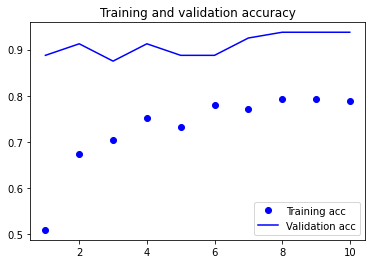

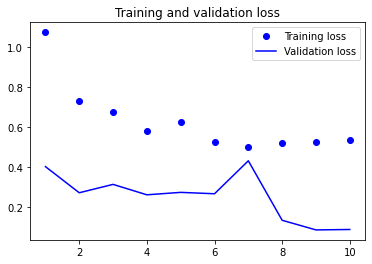

Found 200 images belonging to 4 classes.
test accuracy: 95.00%


In [43]:
#model.save('modelQ5.try4') #important do not change the name of the model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

import numpy as np
test_dir= os.path.join(base_dir, 'test') # very important: do not change this!



datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
        test_dir, 
        target_size=(150, 150), 
        batch_size=32, 
        class_mode='categorical')

loss , acc = model.evaluate_generator(generator=test_generator)
print("test accuracy: {:5.2f}%".format(100*acc))